In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns
sns.set()

## Analisis Overview

### Analisis ini akan menjawab beberapa pertanyaan
1. berapa banyak pengguna sepeda pada bulan ini
2. bagaimana kebiasaan pengguna speda pada bulan ini

### Untuk menjawab pertanyaan tersebut, analisis ini fokus pada beberapa variabel
independent variabel :  
    1. Tipe pengguna(Member, dan Casual)
    
Dependent variabel :  
    1. Jumlah pengguna sepeda.  
    2. durasi penggunaan sepeda.  
    3. stasiun untuk memulai dan mengakhiri.  
    4. hari apa paling banyak pengguna speda.  
    5. waktu rata-rata pengguna mulai menggunakan sepeda


In [2]:
raw_data = pd.read_csv('202004-divvy-tripdata.csv')
raw_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


### Cleaning Data
1. merubah format waktu dan tanggal dari object menjadi datetime
2. menambah kolom baru yaitu kolom day untuk mendapatkan nama hari
3. menambah kolom jam yang berisi angka jam
4. menambah kolom count agar dapat mempermudah dalam penghitungan

In [3]:
raw_data['started_at'] = pd.to_datetime(raw_data['started_at'])
raw_data['ended_at'] = pd.to_datetime(raw_data['ended_at'])
raw_data['day'] = raw_data['started_at'].dt.day_name()
raw_data['start hour'] = raw_data['started_at'].dt.hour
raw_data['duration'] = raw_data['ended_at'] - raw_data['started_at']

In [4]:
clean_df = raw_data
clean_df['count'] = 1

In [5]:
clean_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,start hour,duration,count
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,Sunday,17,0 days 00:26:49,1
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,Friday,17,0 days 00:08:09,1
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,Wednesday,17,0 days 00:14:23,1
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,Tuesday,12,0 days 00:12:12,1
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,Saturday,10,0 days 00:52:55,1


### Jumlah Pengguna pada masing masing tipe pengguna

<AxesSubplot:>

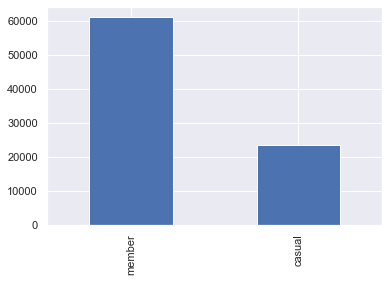

In [83]:
clean_df['member_casual'].value_counts().plot(kind='bar')

Jumlah pengguna speda pada bulan ini ada 84776, dengan pengguna member berjumlah 61148, dan pengguna casual berjumlah 2328


### Durasi rata-rata penggunaan speda pada masing-masing pengguna

Text(0.5, 0, 'Jenis pengguna')

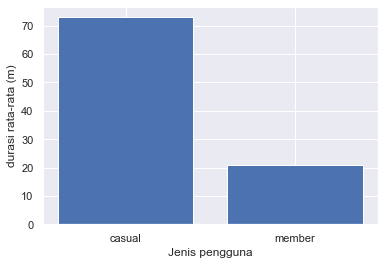

In [57]:
time_df = pd.DataFrame(clean_df.groupby('member_casual')['duration'].mean()).reset_index()[['member_casual','duration']]
time_df['duration'] = time_df['duration'].astype('str')

def get_time(duration):
    return duration.split(' ')[2].split('.')[0]
time_df['duration'] = time_df['duration'].apply(lambda x:f"{get_time(x)}")

duration_in_minute = time_df['duration'].str.split(':').apply(lambda x: int(x[0])*60 + int(x[1]))
duration_in_minute
time_df['duration_in_minute'] = duration_in_minute
tipe = time_df.member_casual

plt.bar(time_df.member_casual, time_df['duration_in_minute'])
plt.xticks(time_df.member_casual)
plt.ylabel('durasi rata-rata (m)')
plt.xlabel('Jenis pengguna')

### Analisis durasi rata rata penggunaan sepeda
#### rata-rata dan std deviasi durasi penggunaan sepeda
rata-rata = 35 menit,  
std deviasi = 9 jam 27 menit

tipe pengguna casual :  
rata rata = 1 jam 13 menit,  
std deviasi = 15 jam 19 menit  
tipe pengguna member :  
rata-rata = 21 menit,  
std deviasi = 6 jam 4 menit  
Dapat disimpulkan bahwa tipe pengguna casual memiliki rata-rata durasi penggunaan yang lebih lama dari tipe pengguna member 

### stasiun yang paling banyak digunakan untuk memulai

<AxesSubplot:>

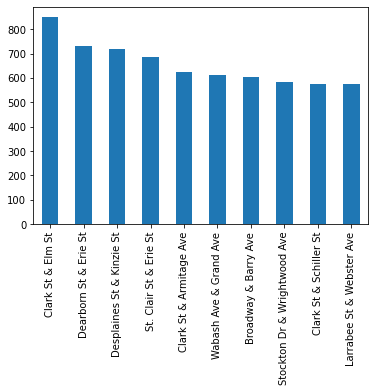

In [177]:
clean_df['start_station_name'].value_counts(ascending = False).head(10).plot(kind = 'bar')

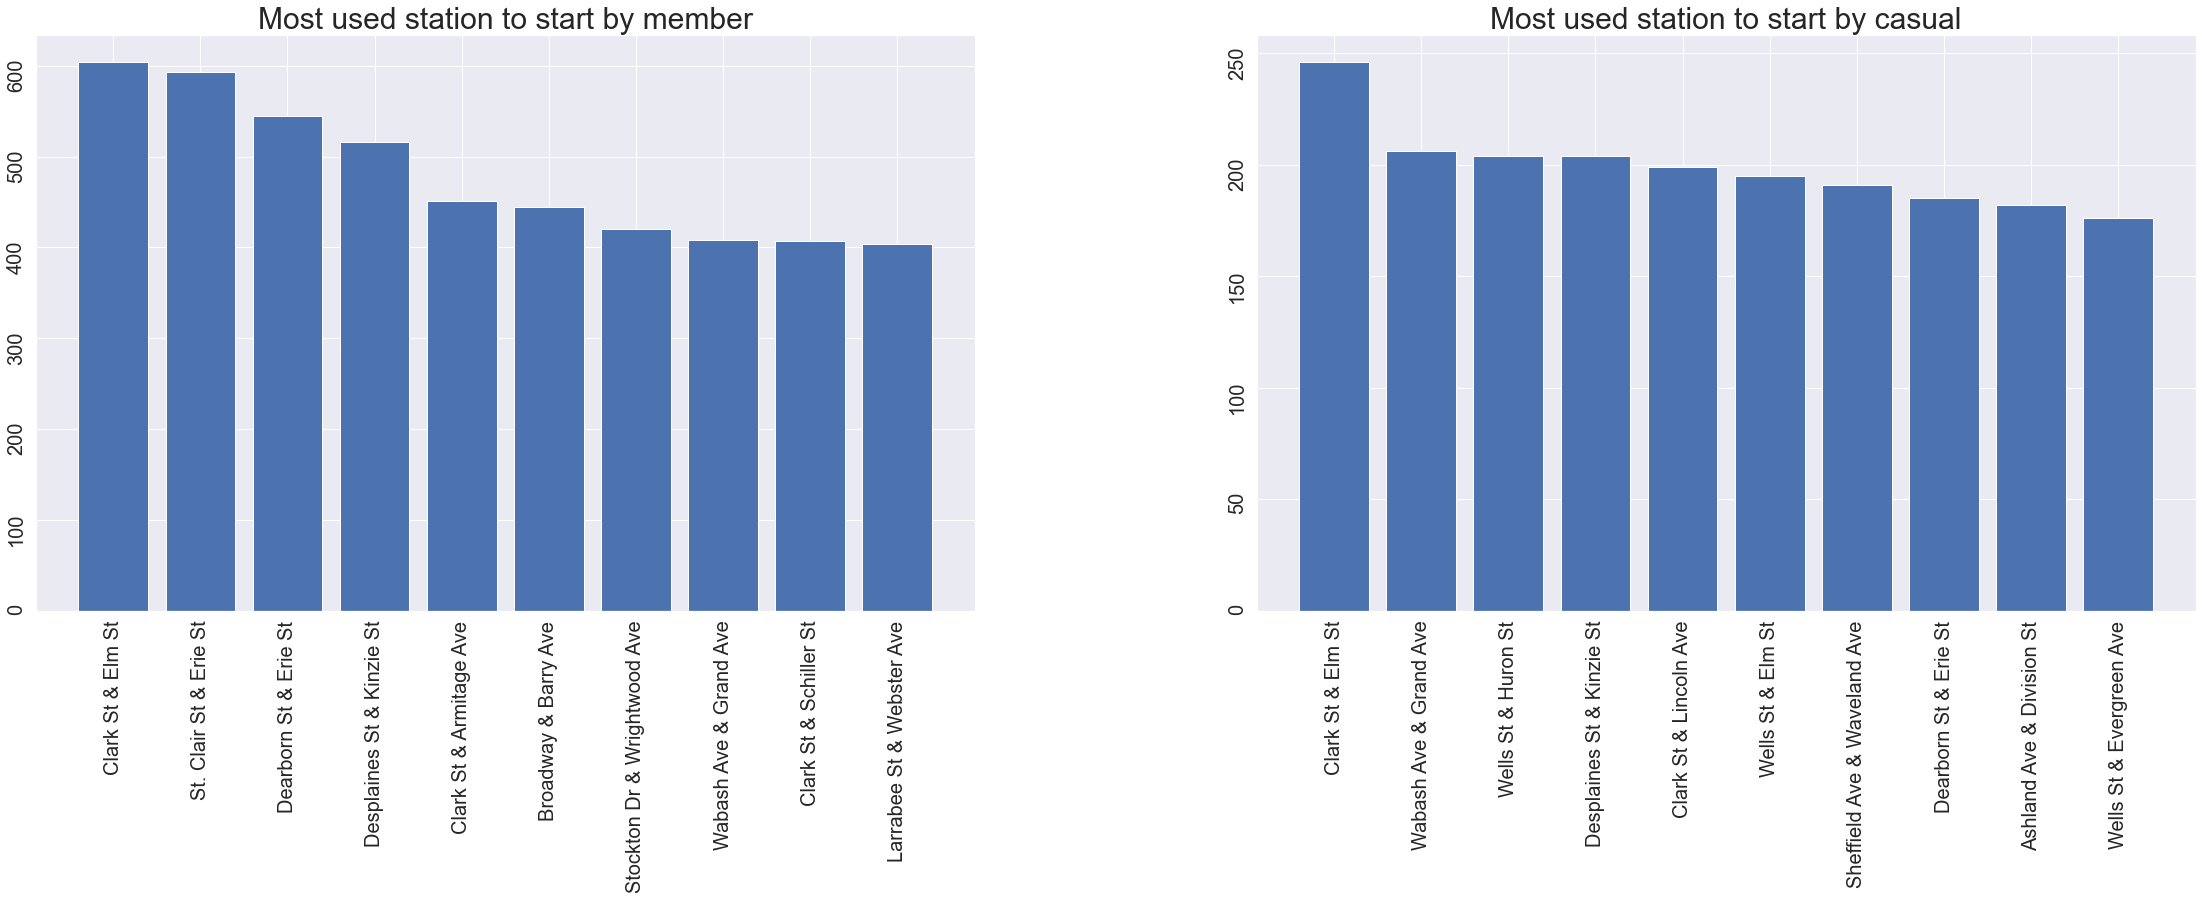

In [62]:
sst = clean_df.groupby(['member_casual','start_station_name']).sum().sort_values('count', ascending=False).reset_index()[['member_casual','start_station_name','count']]
statmem = sst[sst['member_casual'] == 'member'].head(10)
statcas = sst[sst['member_casual'] != 'member'].head(10)

figure, axis = plt.subplots(1, 2)
axis[0].bar(statmem['start_station_name'], statmem['count'])
axis[0].set_title('Most used station to start by member', size =30)
axis[0].tick_params(labelrotation=90, labelsize = 20)

axis[1].bar(statcas['start_station_name'], statcas['count'])
axis[1].set_title('Most used station to start by casual', size =30)
axis[1].tick_params(labelrotation=90, labelsize = 20)

plt.subplots_adjust(left=0, bottom=0.5,right=5,top=2.5,wspace=0.3,hspace=0.3)
plt.show()

### Analisis stasiun yang paling banyak digunakan untuk memulai
Clark St & Elm St paling banyak digunakan pesepeda untuk memulai, kedua ada Dearborn St & Erie St, dilanjutkan St. Clair St & Erie St , dan Clark St & Armitage Ave  sebagai stasiun speda yang paling banyak digunakan untuk memulai
  
tipe pengguna member :  
pengguna member paling banyak menggunakan Clark St & Elm St, dilanjutkan St. Clair St & Erie St, Dearborn St & Erie St, dan Desplaines St & Kinzie St  
tipe pengguna casual :  
pengguna member paling banyak menggunakan Clark St & Elm St, dilanjutkan Wabash Ave & Grand Ave, Wells St & Huron St, dan Desplaines St & Kinzie St	 
  
Dapat disimpulkan bahwa stasiun Clark St & Elm St paling banyak digunakan untuk memulai dari kedua tipe pengguna 

### stasiun yang paling banyak untuk berhenti

<AxesSubplot:>

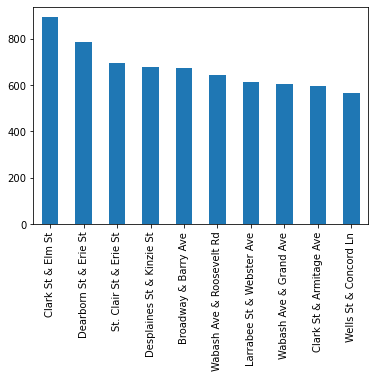

In [178]:
clean_df['end_station_name'].value_counts(ascending = False).head(10).plot(kind = 'bar')

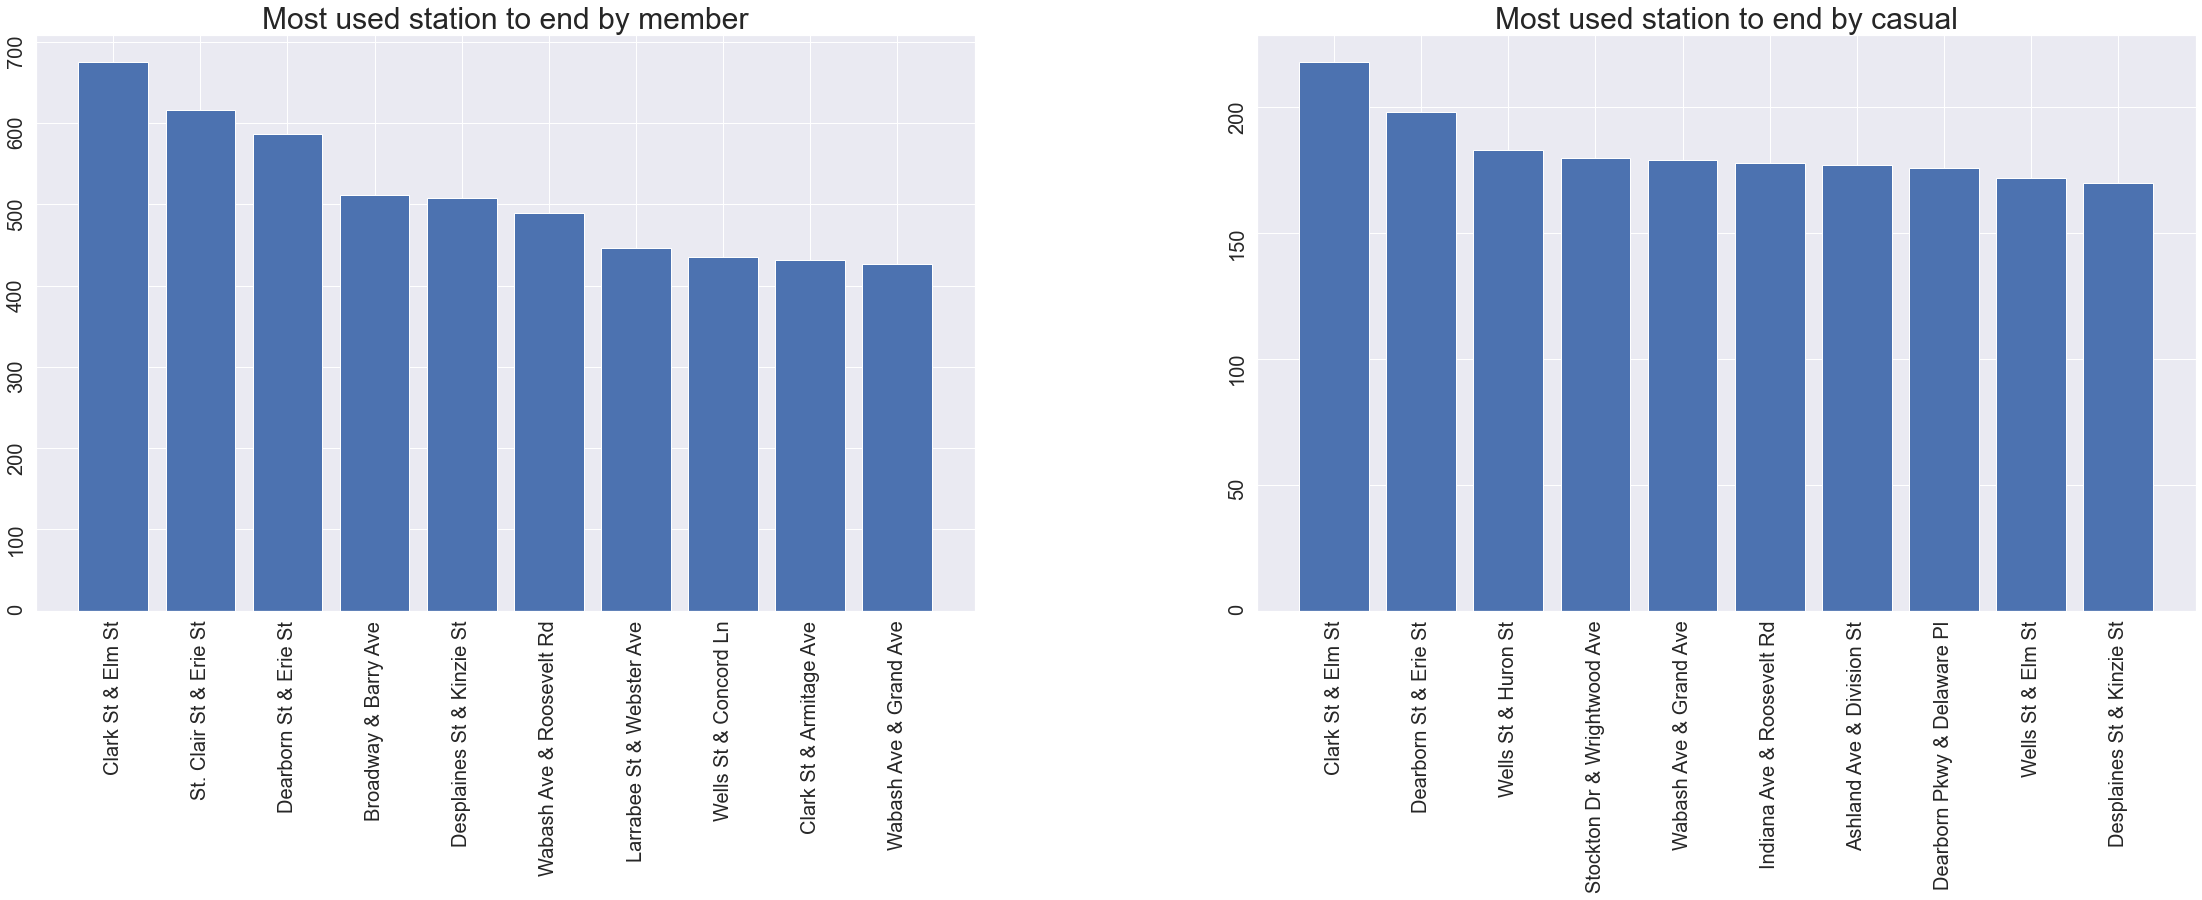

In [51]:
sst = clean_df.groupby(['member_casual','end_station_name']).sum().sort_values('count', ascending=False).reset_index()[['member_casual','end_station_name','count']]
etatmem = sst[sst['member_casual'] == 'member'].head(10)
etatcas = sst[sst['member_casual'] != 'member'].head(10)

figure, axis = plt.subplots(1, 2)
axis[0].bar(etatmem['end_station_name'], etatmem['count'])
axis[0].set_title('Most used station to end by member', size =30)
axis[0].tick_params(labelrotation=90, labelsize = 20)

axis[1].bar(etatcas['end_station_name'], etatcas['count'])
axis[1].set_title('Most used station to end by casual', size =30)
axis[1].tick_params(labelrotation=90, labelsize = 20)

plt.subplots_adjust(left=0, bottom=0.5,right=5,top=2.5,wspace=0.3,hspace=0.3)
plt.show()

### Analisis stasiun yang paling banyak digunakan untuk mengakhiri perjalanan speda
Clark St & Elm St paling banyak digunakan pesepeda untuk mengakhiri, kedua ada Dearborn St & Erie St, dilanjutkan St. Clair St & Erie St , dan Desplaines St & Kinzie St  sebagai stasiun speda yang paling banyak digunakan untuk memulai
  
tipe pengguna member :  
pengguna member paling banyak menggunakan Clark St & Elm St, dilanjutkan St. Clair St & Erie St, Dearborn St & Erie St, dan Broadway & Barry Ave  
tipe pengguna casual :  
pengguna member paling banyak menggunakan Clark St & Elm St, dilanjutkan Dearborn St & Erie St, Wells St & Huron St, dan Stockton Dr & Wrightwood Ave 
  
Dapat disimpulkan bahwa stasiun Clark St & Elm St juga paling banyak digunakan untuk mengakhiri dari kedua tipe pengguna 

### hari paling banyak pengguna sepeda

<AxesSubplot:>

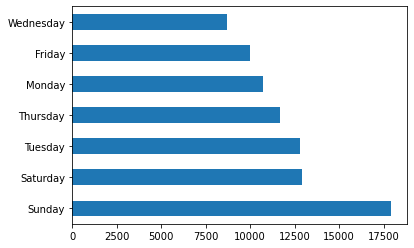

In [180]:
clean_df['day'].value_counts().plot(kind = 'barh')

<AxesSubplot:xlabel='day'>

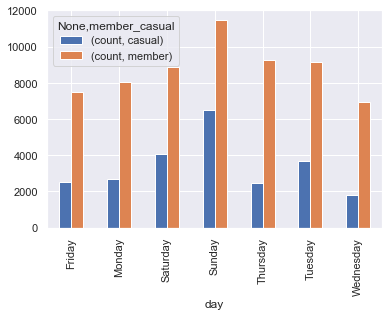

In [71]:
axe = clean_df.groupby(['member_casual','day']).count().sort_values('count').reset_index()[['member_casual','day','count']]
axes = axe.pivot(index = 'day', columns='member_casual')
axes.plot(kind='bar')

### Analisis hari yang paling banyak digunakan untuk bersepeda
Minggu dan Sabtu menjadi hari yang paling banyak digunakan untuk bersepeda, setelah itu kamis, selasa, senin, jumat dan rabu
  
tipe pengguna member :  
pengguna member paling banyak bersepeda pada hari minggu, kemudian sabtu, dilanjutkan kamis, selasa, sabtu, senin, jumat dan rabu  
tipe pengguna casual :  
pengguna member paling banyak bersepeda pada hari minggu, kemudian sabtu, dilanjutkan selasa, senin, jumat, kamis dan rabu  
  
Dapat disimpulkan bahwa saat weekend(minggu, sabtu) banyak digunakan untuk bersepeda

### rata-rata jam mulai bersepeda

In [77]:
clean_df.groupby('member_casual')['start hour'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,23628.0,14.390046,3.523794,0.0,12.0,15.0,17.0,23.0
member,61148.0,13.908452,4.024451,0.0,11.0,14.0,17.0,23.0


### Analisis rata-rata durasi dalam bersepeda
pengguna casual cenderung memiliki durasi yang lebih lama dari pengguna casual :  
    pengguna casual memulai bersepeda rata-rata jam 14.00 dan std dev 3.5  
    pengguna member memulai bersepeda rata-rata jam 13.00 dan std dev 4